```
Instructor: Zachary Fox 
Authors: Lisa Weber + Zachary Fox
Contact Info: foxzr@ornl.gov llweber@rams.colostate.edu
 
Copyright (c) 2021 Dr. Brian Munsky. 
Dr. Luis Aguilera, Will Raymond
Colorado State University.
Licensed under MIT License.
```
Disclaimer: The codes provided here are not optimized for speed and/or efficiency, and are not intended to be used in research. These Python codes are specifically designed to enhance understanding of Python and the algorithms being discussed. 

A random variable is a quantity $X$ whose precise value is _uncertain_. For example, the height of the first person you see on the street tomorrow is a random variable. 

If $X$ can only take integer values $0,1,2,\ldots$ we say that $X$ is a __discrete random variable__. If $X$ can take the whole range of real values in $\mathbb{R}$, we say that $X$ is a __continuous random variable__. There are random variables that can behave discretely in some domain and continuously in others, but for the purpose of the summer school we will only focus on these two types.

When $X$ is discrete, the __probability mass function__ (PMF) of $X$ gives us the probability for it to have a specific value
$$
p_{X}(n) = \mathrm{Pr}\left(X = n\right).
$$

When $X$ is continuous, we are interested in the __probability density function__ (PDF) of $X$, defined as a function $f_X(x)$ taking nonnegative values such that
$$
\int_a^b{f_X(x)\mathrm{dx}} = \mathrm{Pr}(a \leq X \leq b).
$$



For either case, we define the __cumulative distribution function__ (CDF) of a random variable $X$ by 
$$
F_X(a) := \mathrm{Pr}\left(X \leq a\right) =
\begin{cases}
\sum
_{
  n = -\infty
}
^
{
  a
}
{
    p_X(n)
}, \; \text{ if }X\text{ is discrete}\\
\int_{-\infty}^{a}{f_X(x)\mathrm{dx}},\;\text{ if }X\text{ is continuous}
\end{cases}.
$$

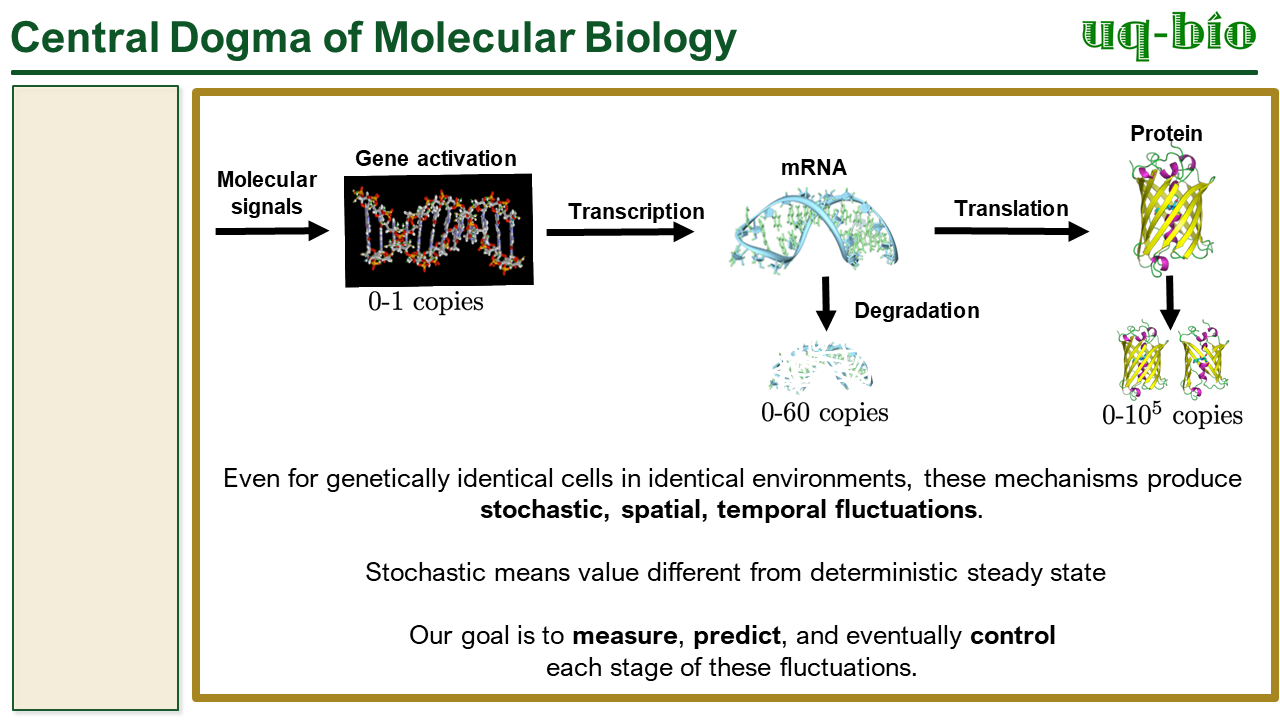

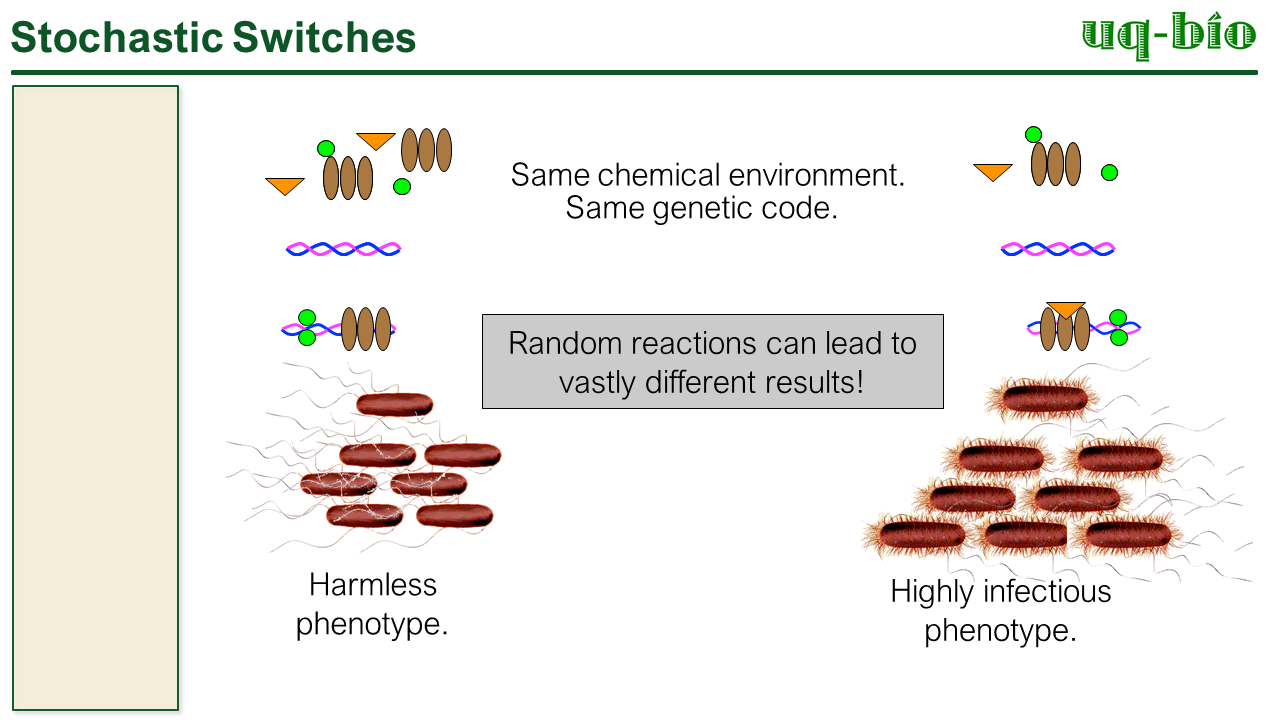

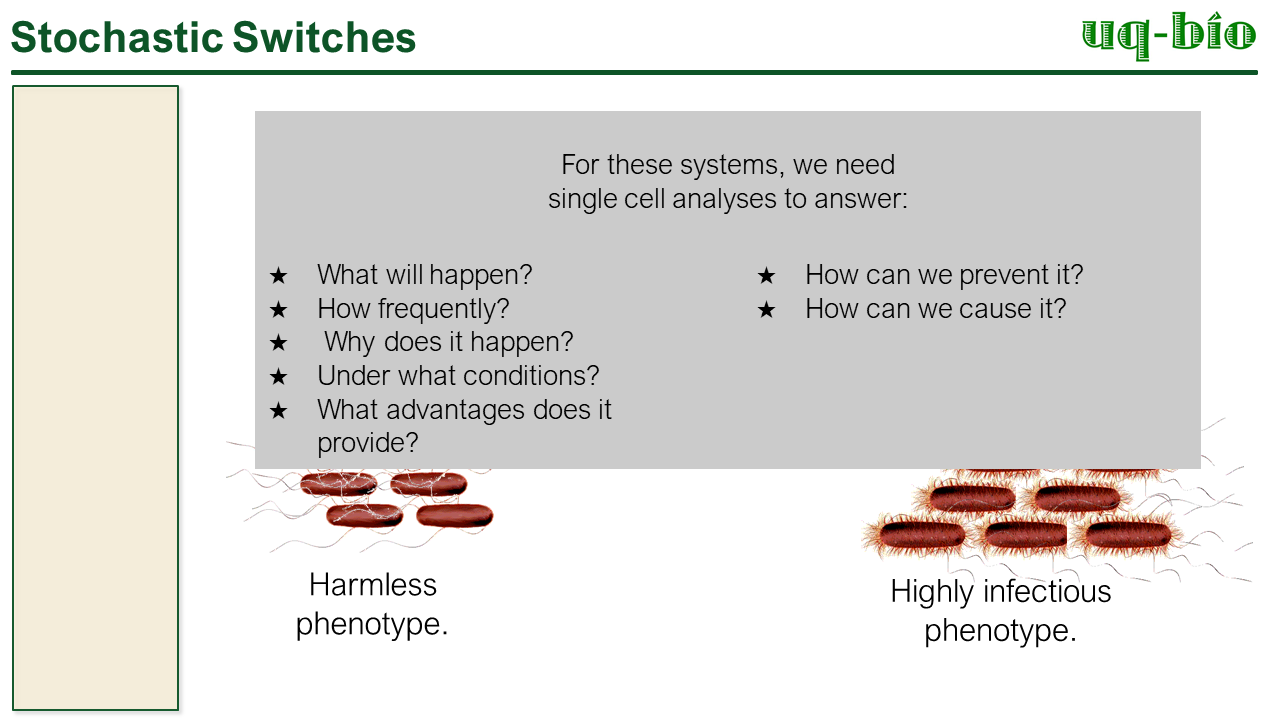

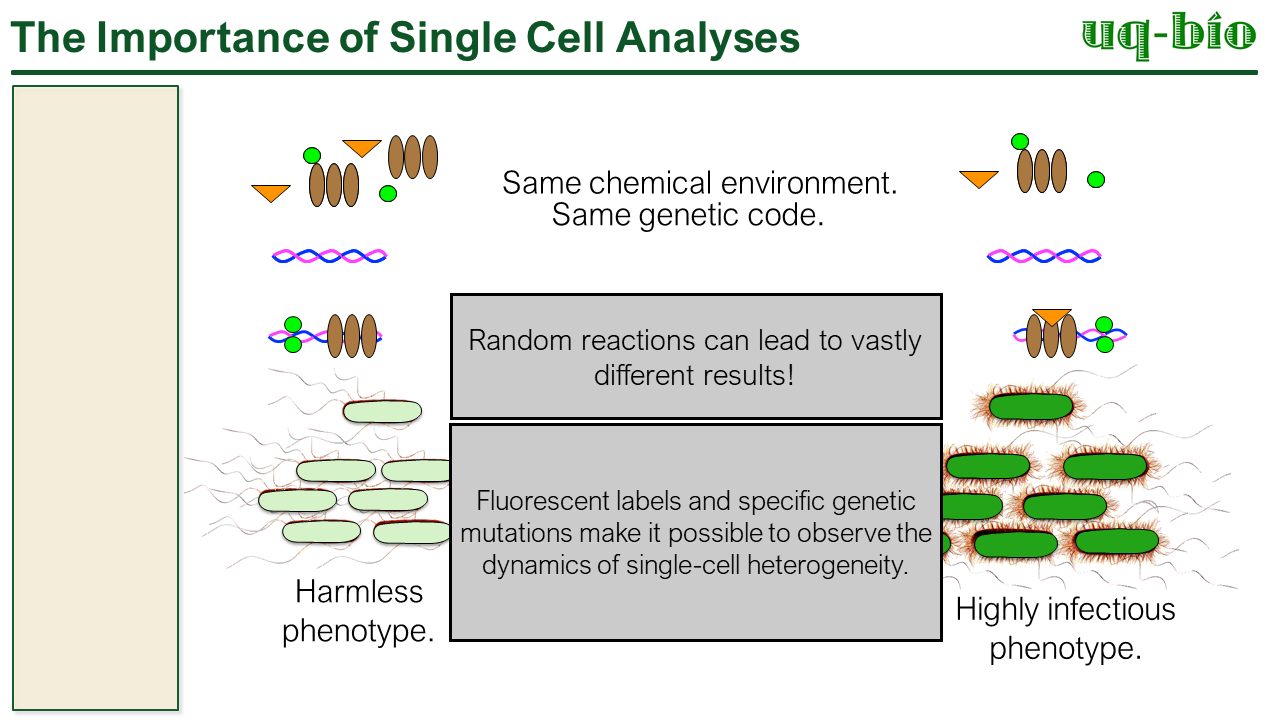

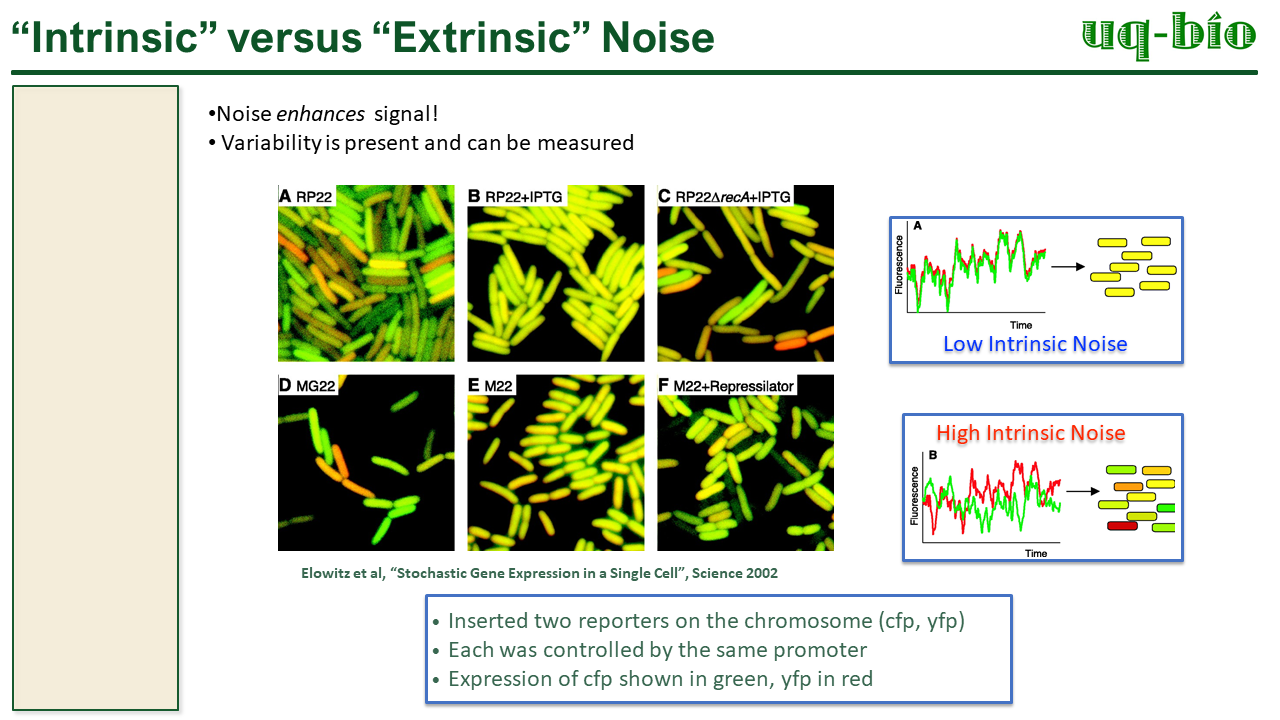

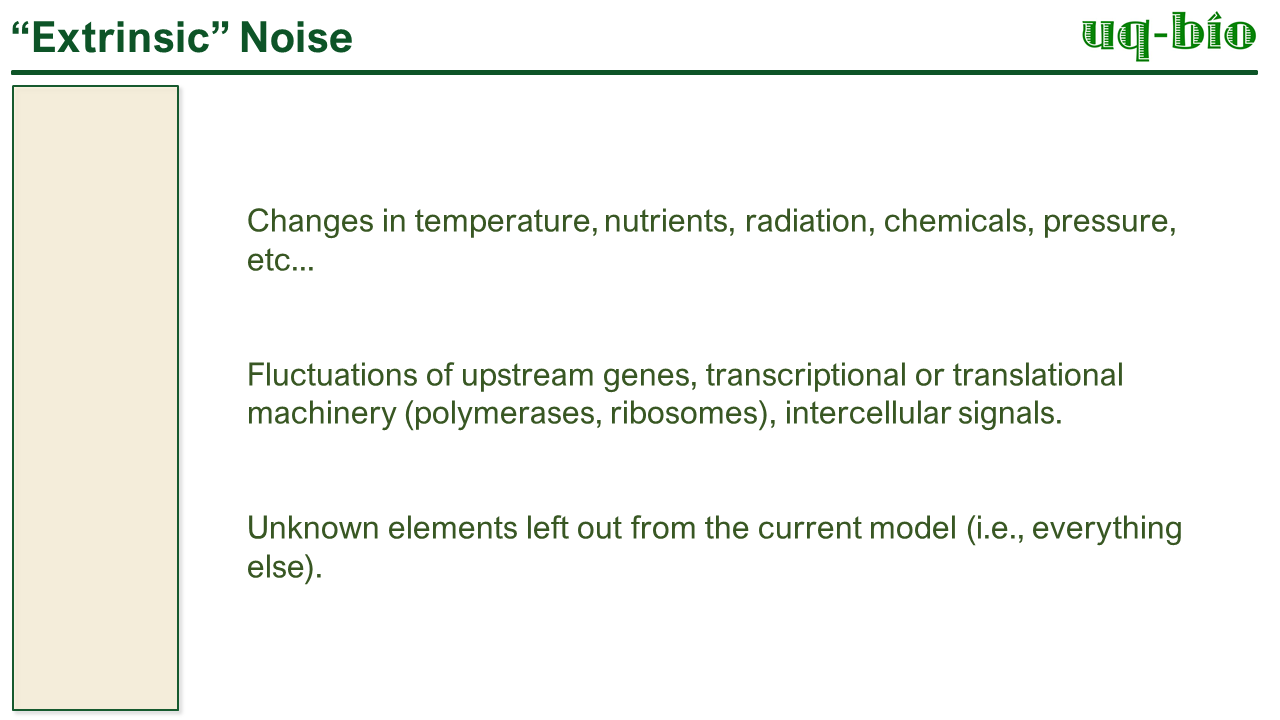

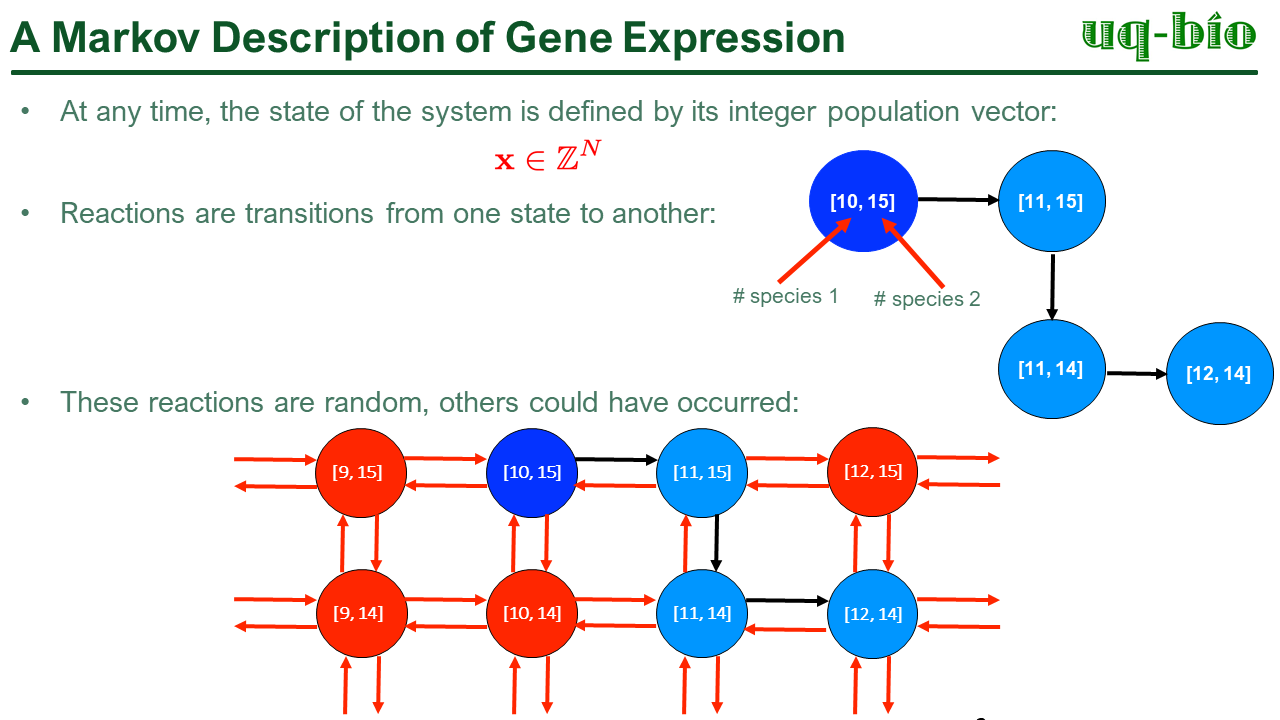

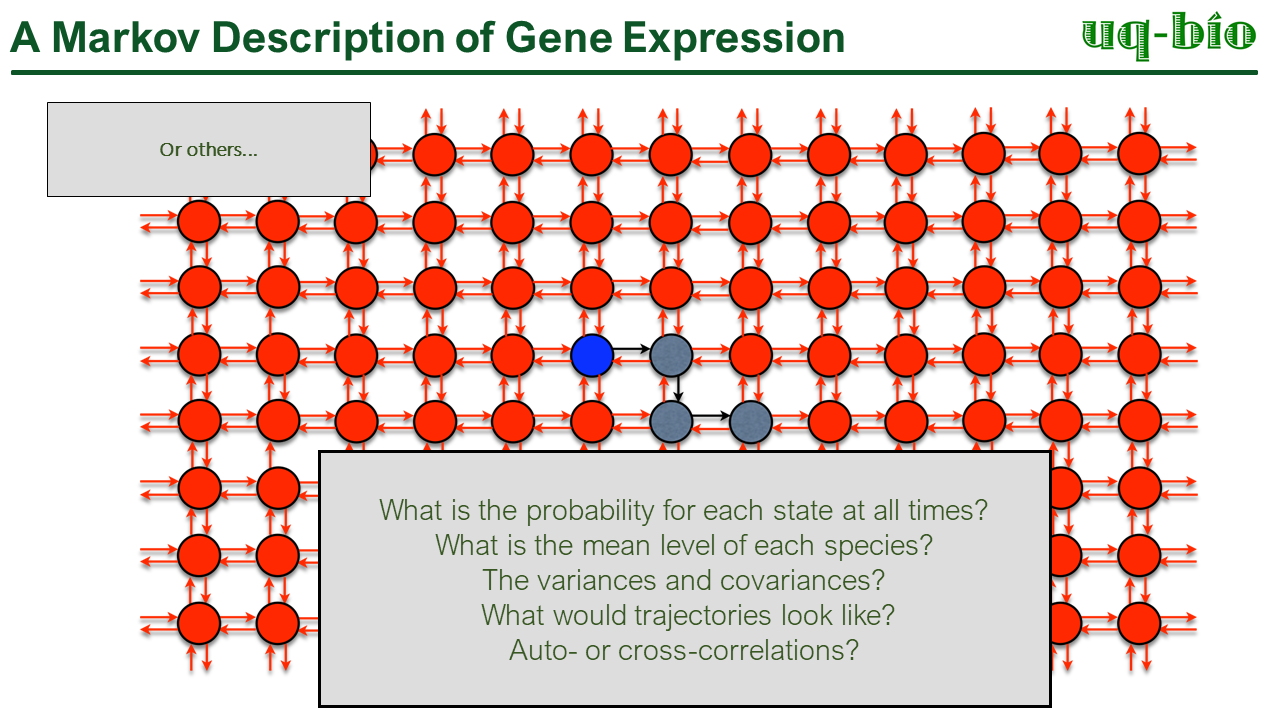

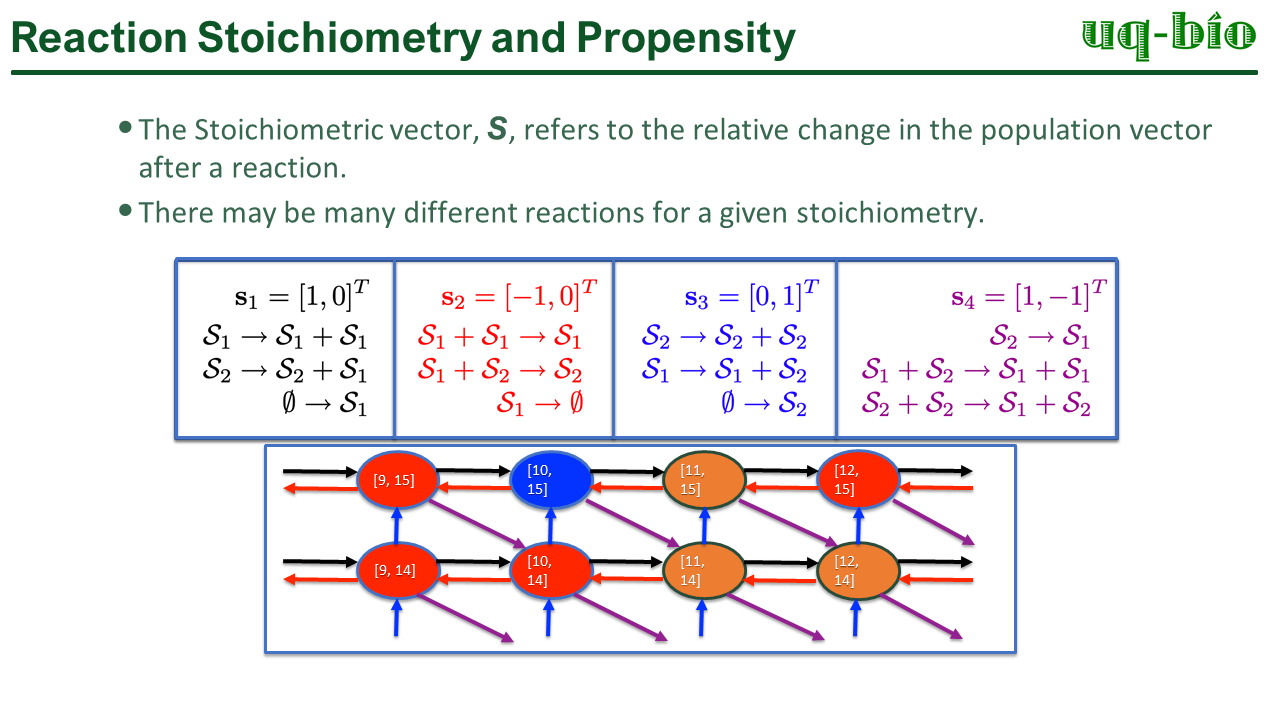

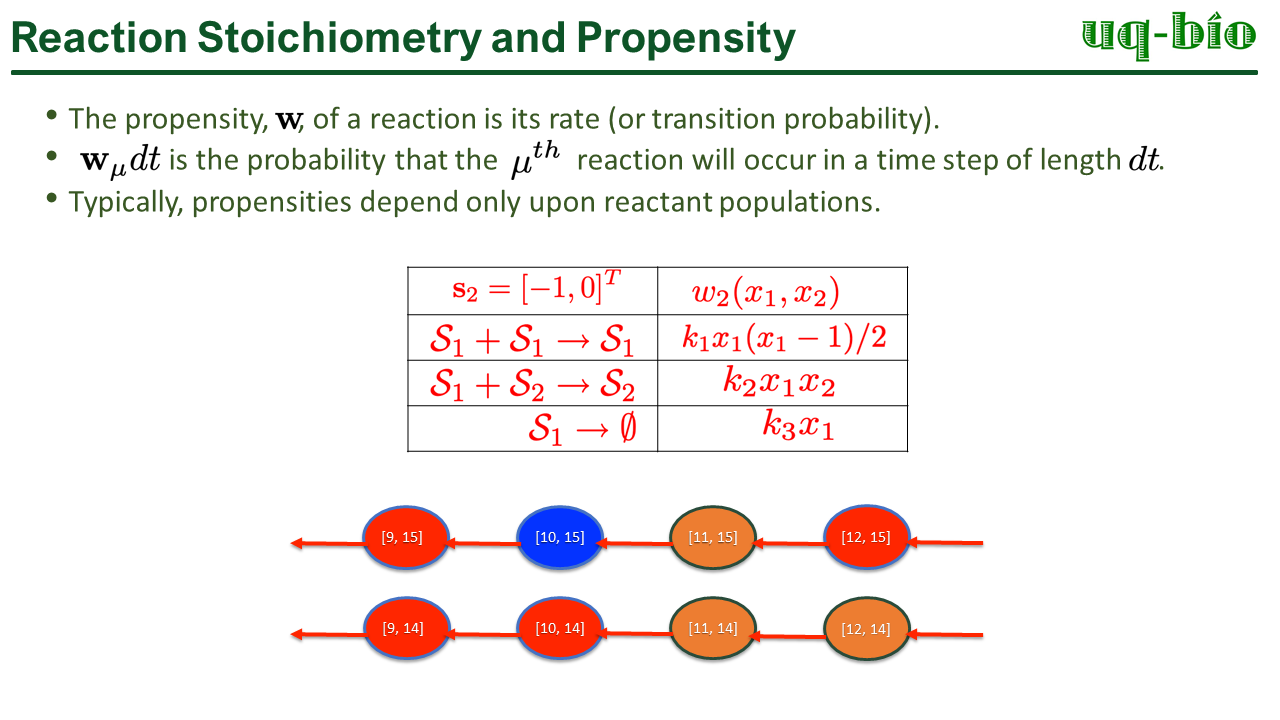

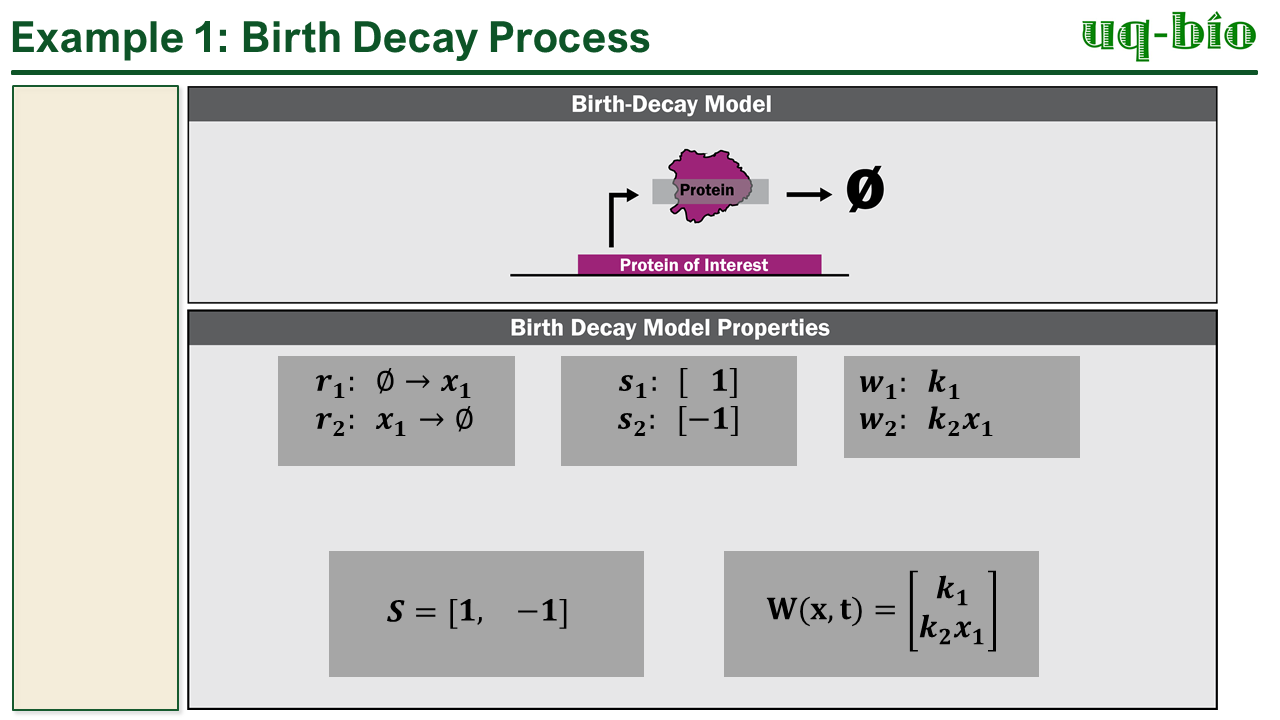

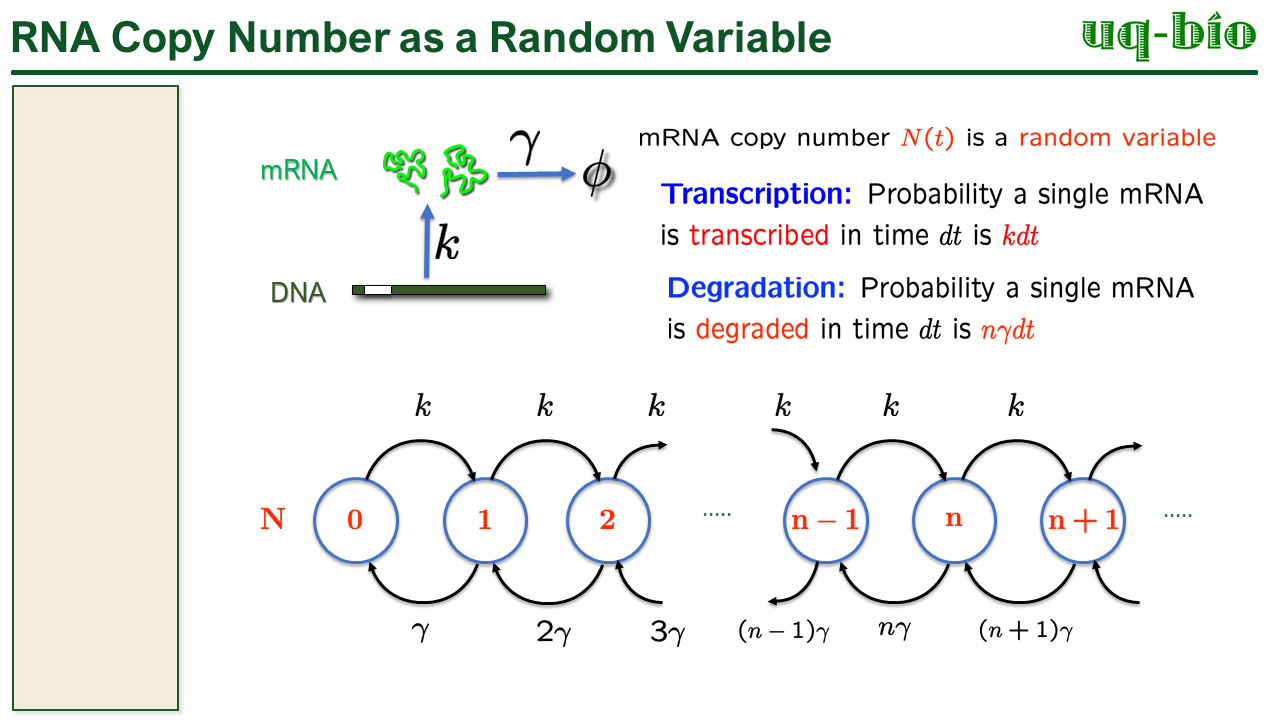

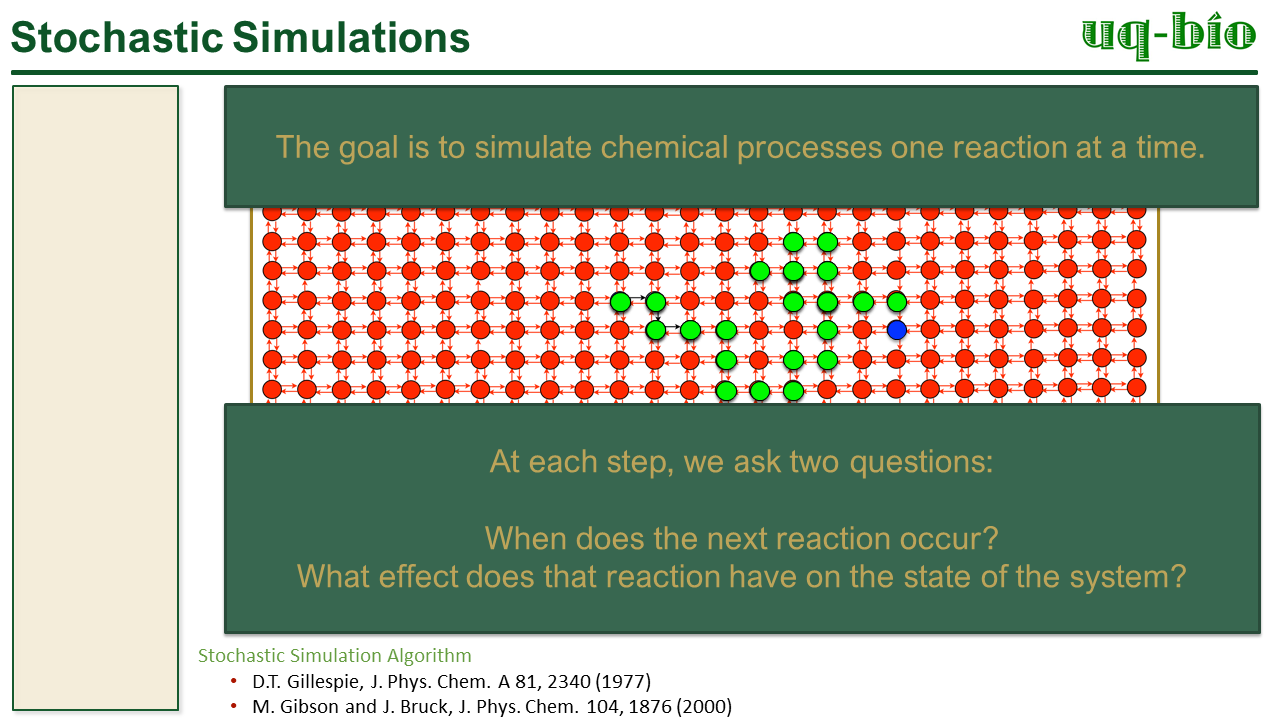

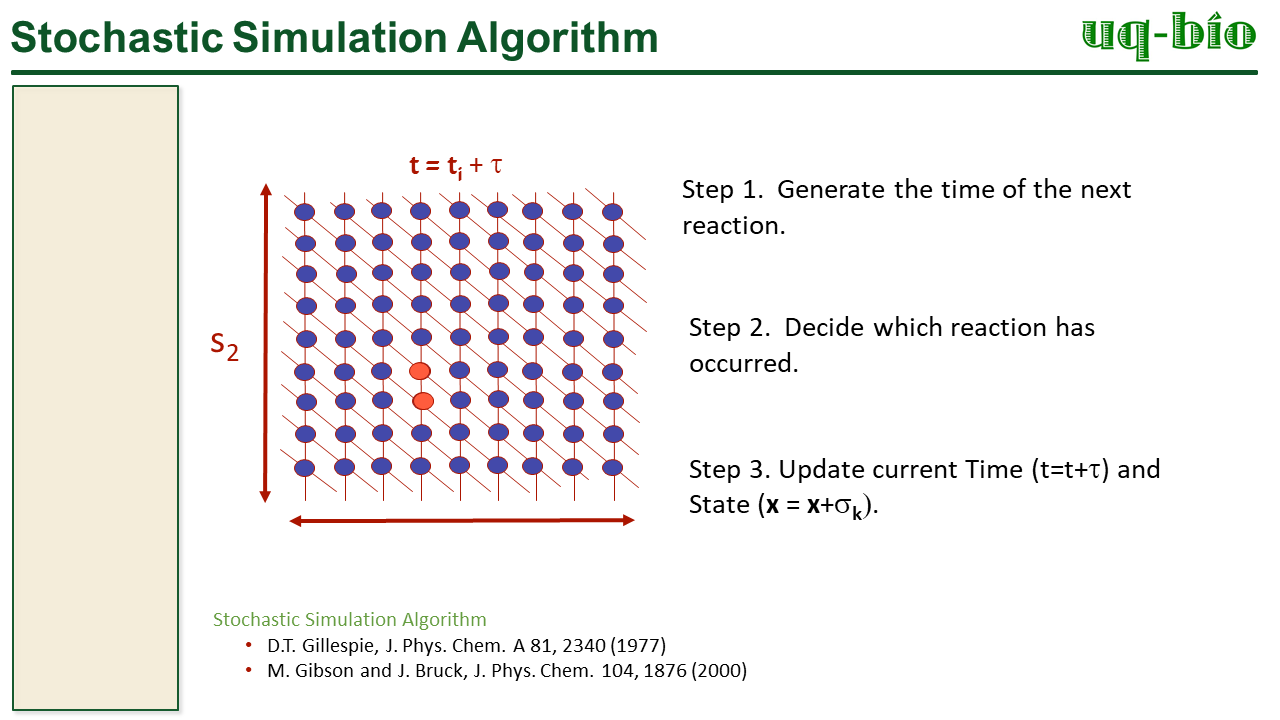

A continuous random variable $X$ has an exponential distribution with parameter $\alpha > 0$, denoted by $X \sim \mathrm{Exp}(\alpha)$,  if it has the PDF
$$
f_X(x) = 
\begin{cases}
\alpha\exp(-\alpha x),\;\text{if }x\geq 0,\\
0,\text{ otherwise}
\end{cases}.
$$
The CDF of this variable is then
$$
F_X(x)
=
\begin{cases}
0,\;x<0,\\
1-\exp(-\alpha{x}),\; x\geq 0.
\end{cases}
$$


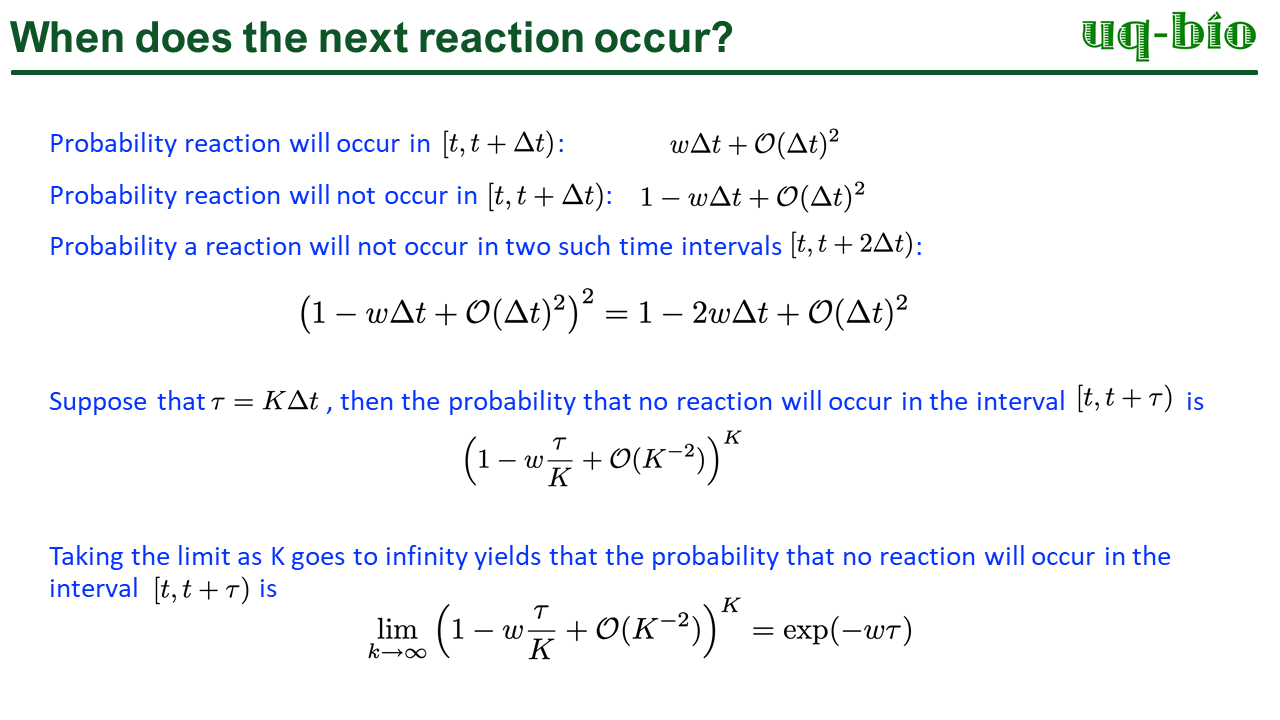

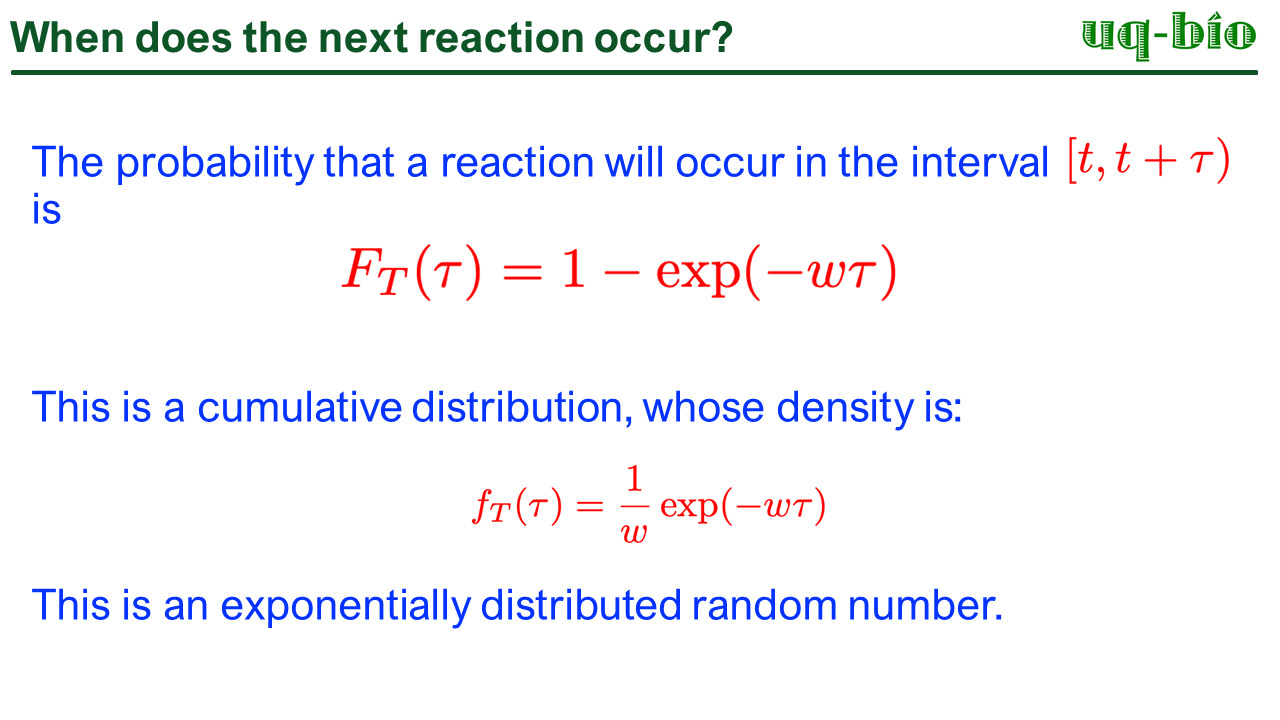

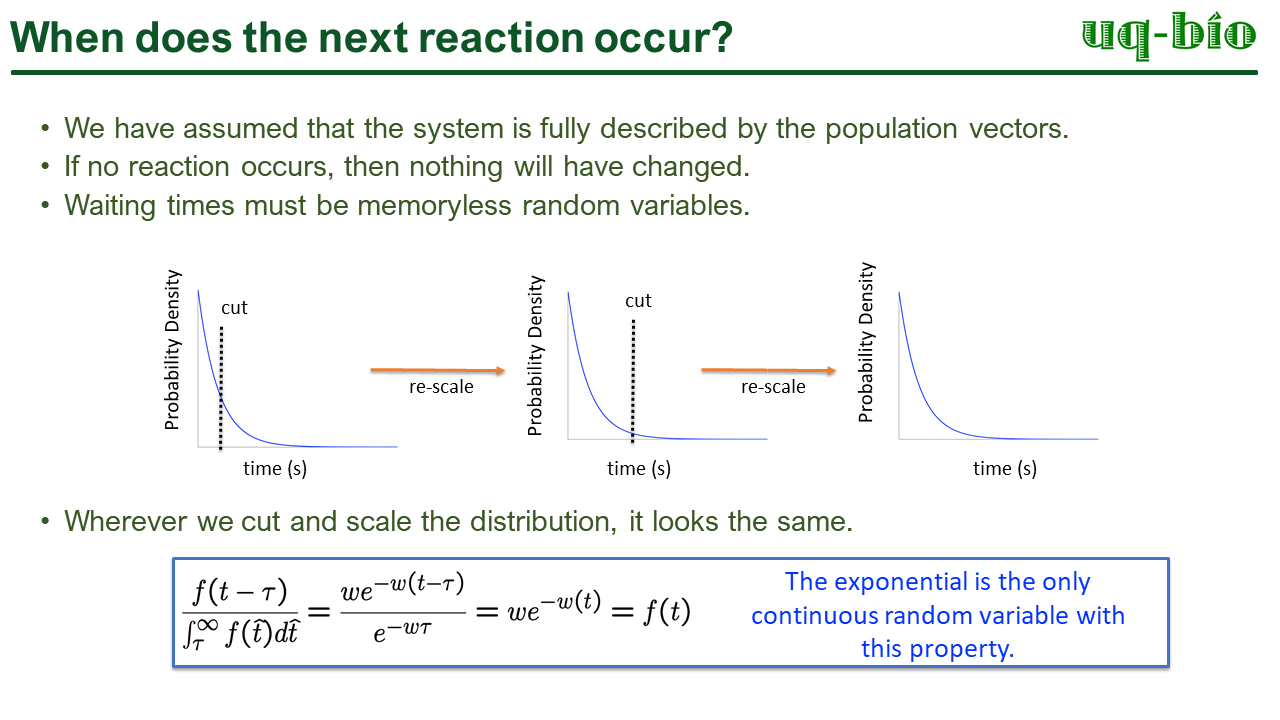

In the above slide, the equations should be:
$\frac{f(t+\tau)}{\int_\tau^\infty f(\hat t)d\hat t} = \frac{w e^{-wt-w\tau}}{e^{-w\tau}} = we^{-wt} = f(t)$.

This is showing that that shift **forward** in time by an amount $\tau$ does not change the shape of the exponentially distributed random variable. 

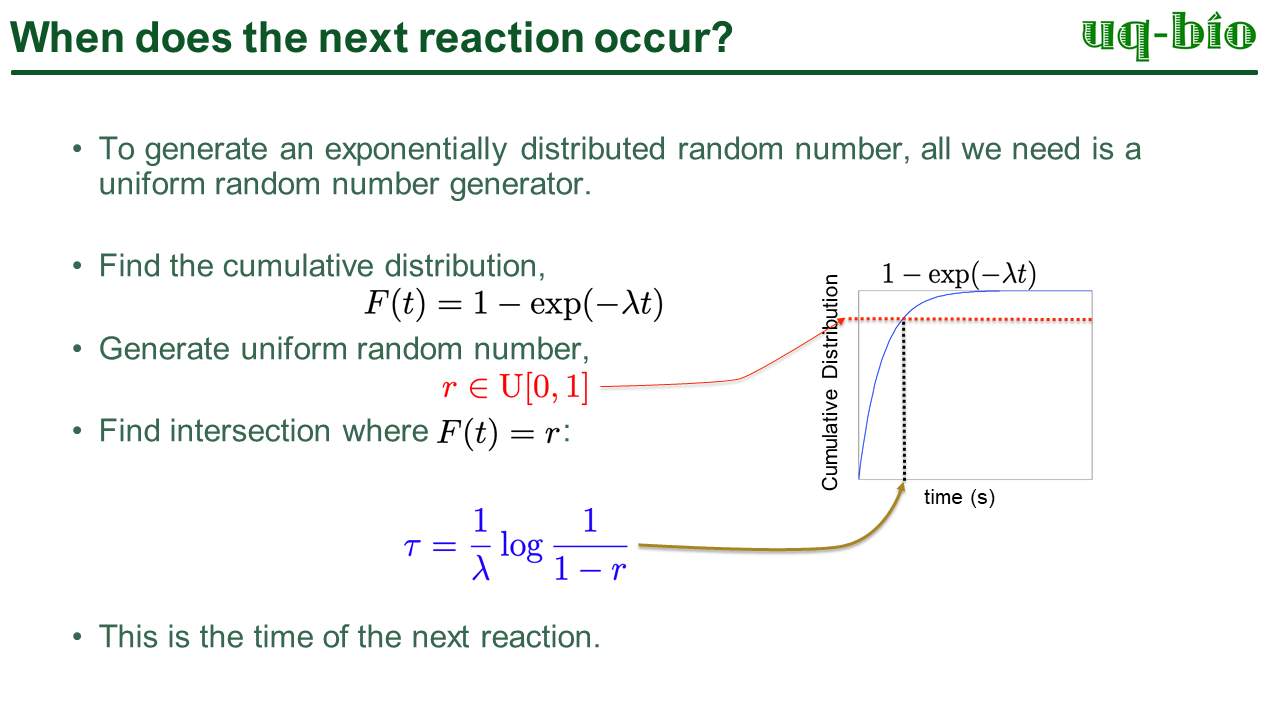

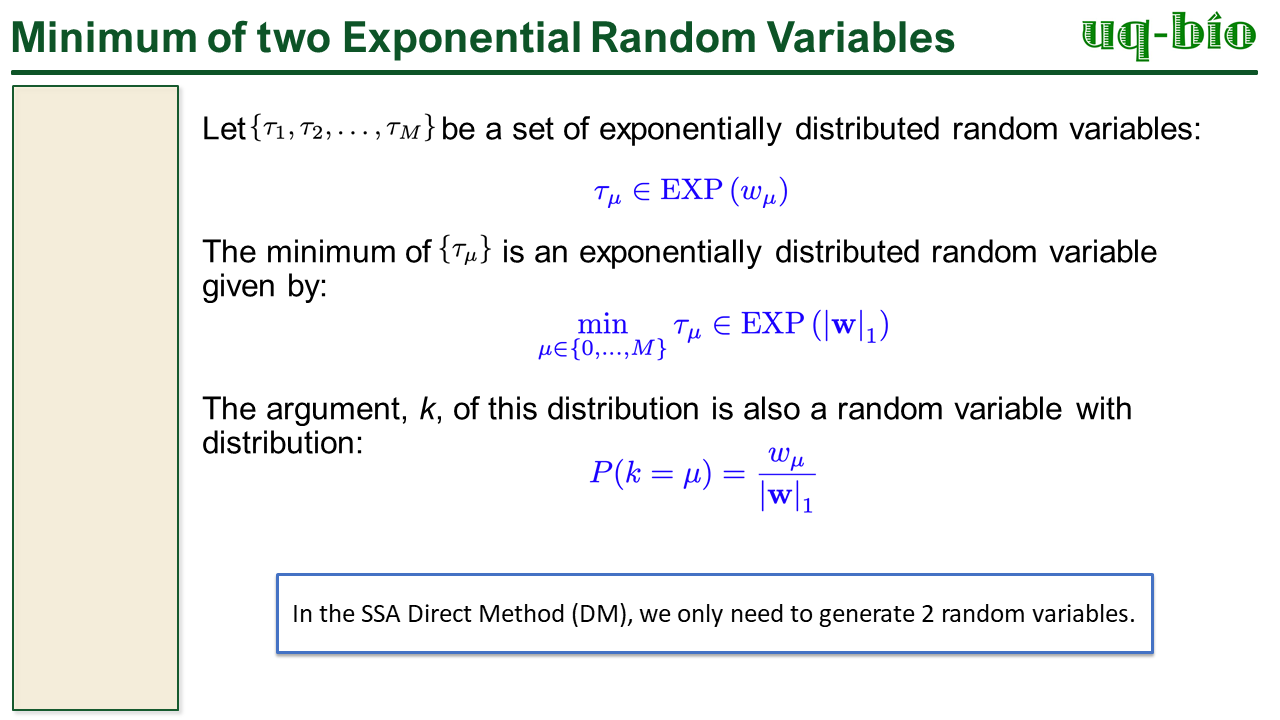

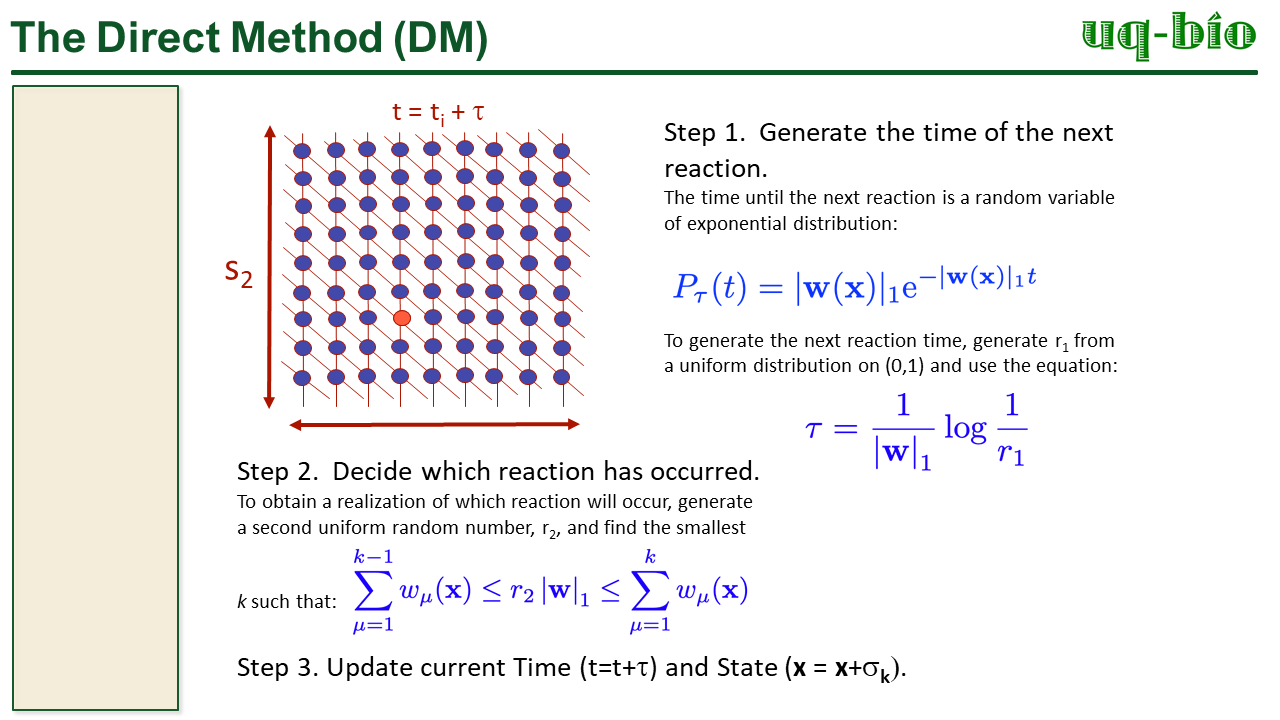

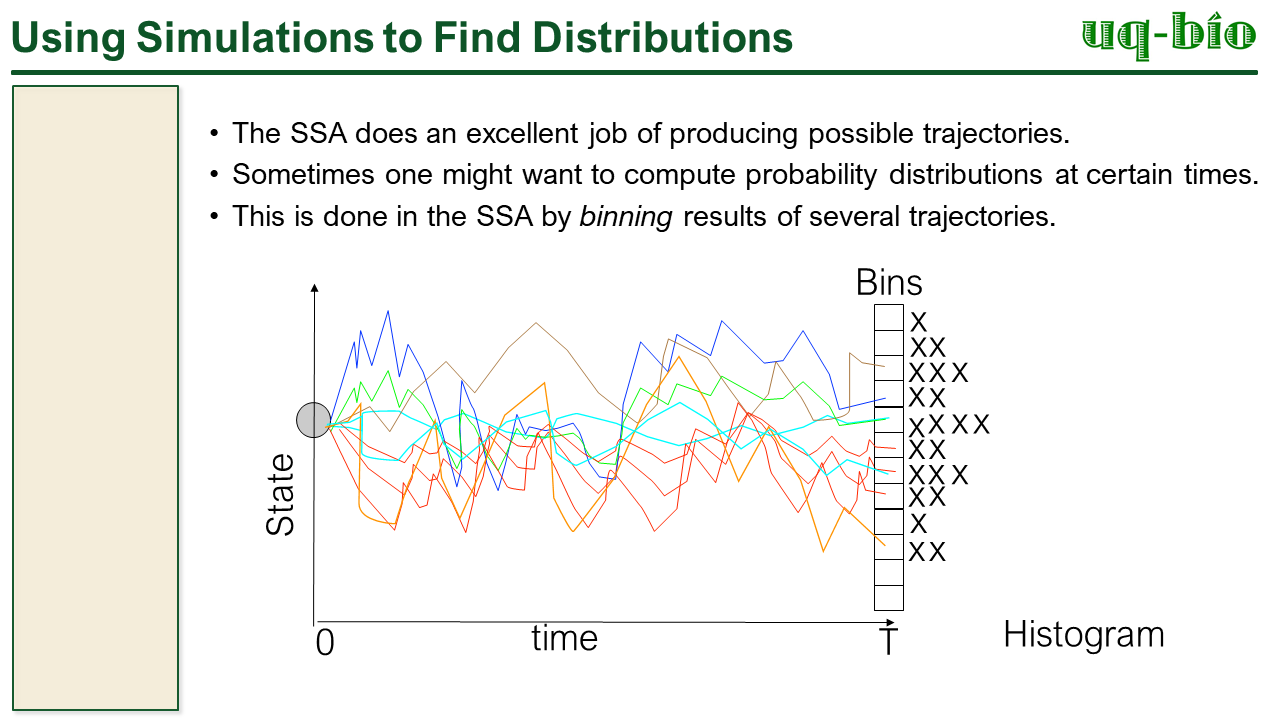

In [91]:
# Function to randomly determine next time and next state using random number generation
# based on the current propensities (exponential waiting time)
def next_jump(W,X):
    current_propensities = W(X)
    total_reactions = current_propensities.shape[1]  # Get total number of reactions

    # Update time of next reaction (where tau = 1/w0*log(1/rand)
    time_next_rxn = -np.log(np.random.rand()) / np.sum(current_propensities)

    # Generate random number to select the new reaction to happen based on current state
    random_rate = np.random.rand() * np.sum(current_propensities)

    # Select the new reaction to happen based on current state
    cumulative_prop = np.cumsum(current_propensities)
    for i in range(total_reactions):
        if cumulative_prop[i] >= random_rate:
            rxn_id = i
            break
    return time_next_rxn,rxn_id  ##Return these back out

In [92]:
def SSA_traj(S, W, x0, time_vector):
    total_states = S.shape[0]     # Get total states (number of species)
    x = x0  # Set the state to initial state
    t = time_vector[0]  # Initial time - 1st time in time_vector
    tstop = time_vector[-1]  # Stop time - Last time in time_vector
    record_index = 0  # Initialize counter
    Nt = len(time_vector)  # Total number of time points
    traj_data = np.zeros((total_states, Nt)) # Preallocate for efficiency

    while t < tstop:  # While time is less than last time point
  
        time_next_rxn, rxn_id = next_jump(W,x)  # Run function to get next time and next reaction
        t += time_next_rxn
        while t >= time_vector[record_index]:  # If time passed the record vector, record the state
            traj_data[:, record_index] = x
            record_index += 1   # Update the counter
            if time_vector[record_index] == tstop:  # If counter has moved past the final time point, end and return the data
                traj_data[:, record_index] = x
                return traj_data

        x = x + S[:, rxn_id]  # Update the state based on last reaction
    


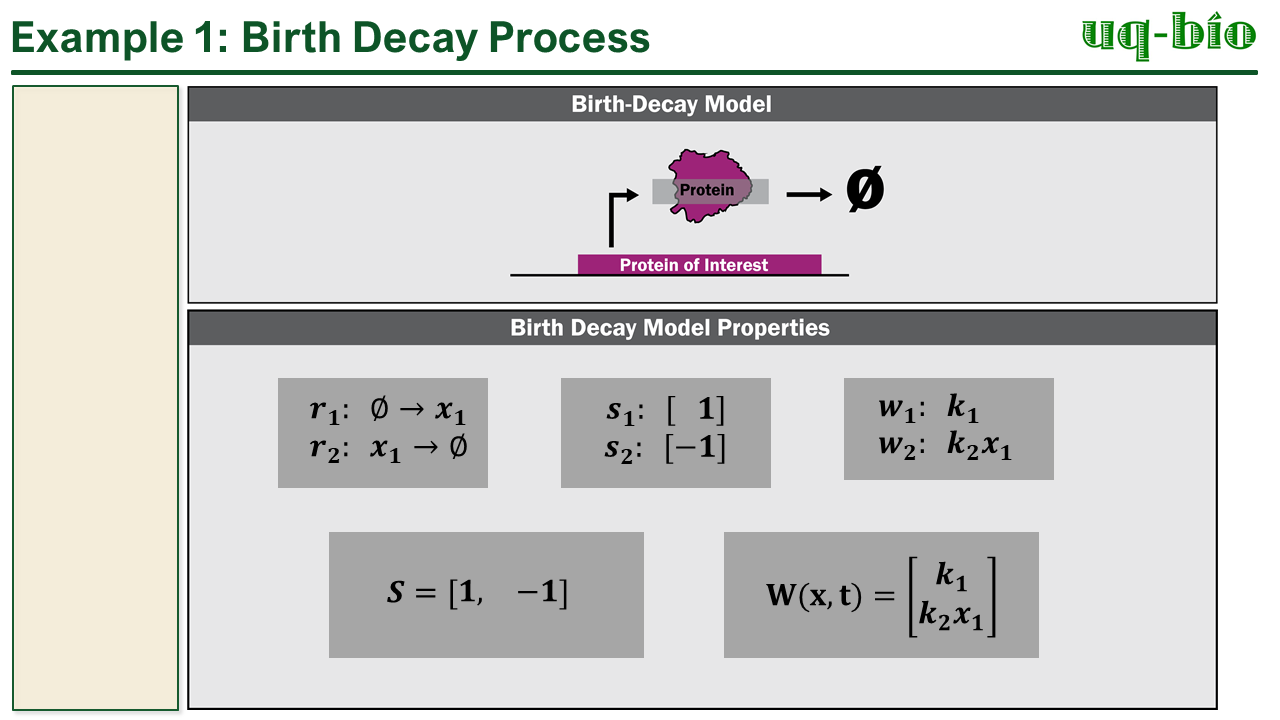

In [90]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot

# we can code this live together! 

# parameters 

# stoichiometry (n_species x n_reactions)


# reactions (1,n_reactions)


 

<IPython.core.display.Javascript object>


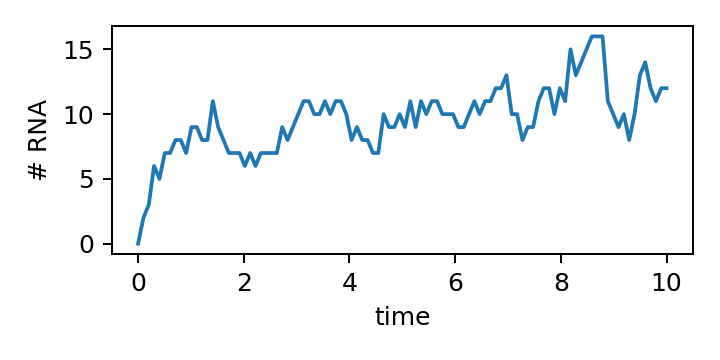

In [113]:
x0 = np.array([0])
time_vector = np.linspace(0,10,100)
traj = SSA_traj(S,prop,x0,time_vector)

f,ax = plt.subplots(figsize=(4,2))
ax.plot(time_vector, traj.T)
ax.set_xlabel('time'); ax.set_ylabel('# RNA')
f.tight_layout()

## Example 2: Model of tumor & effector cells 
[Reference](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0095150) 



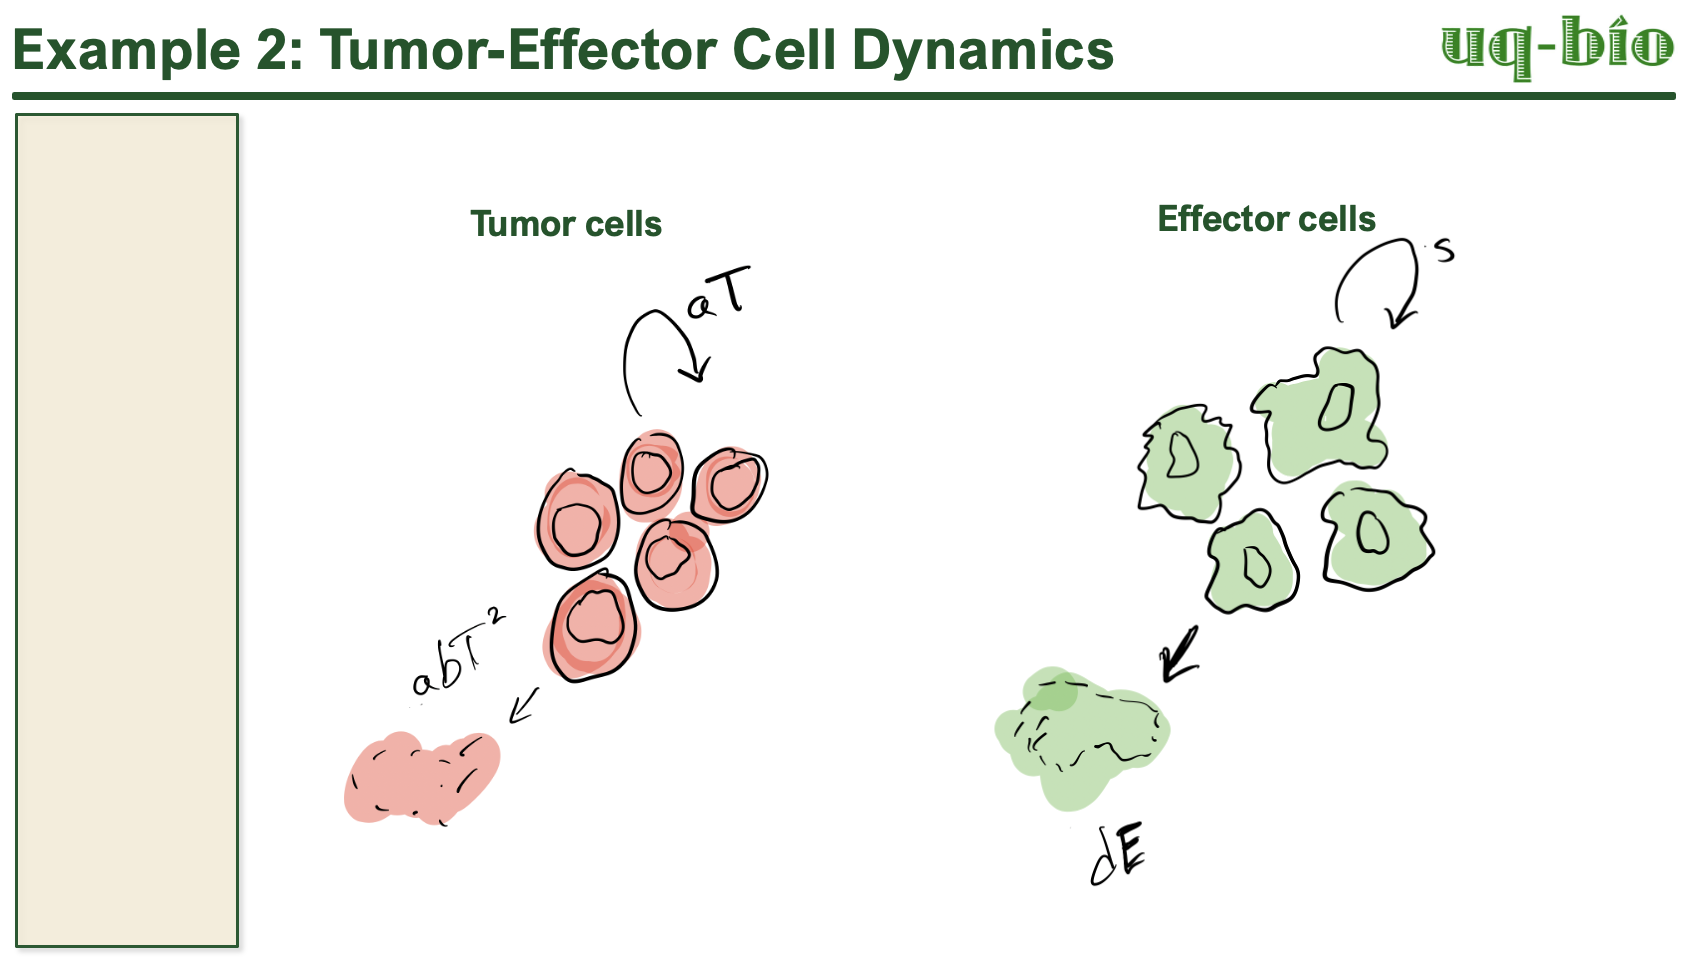

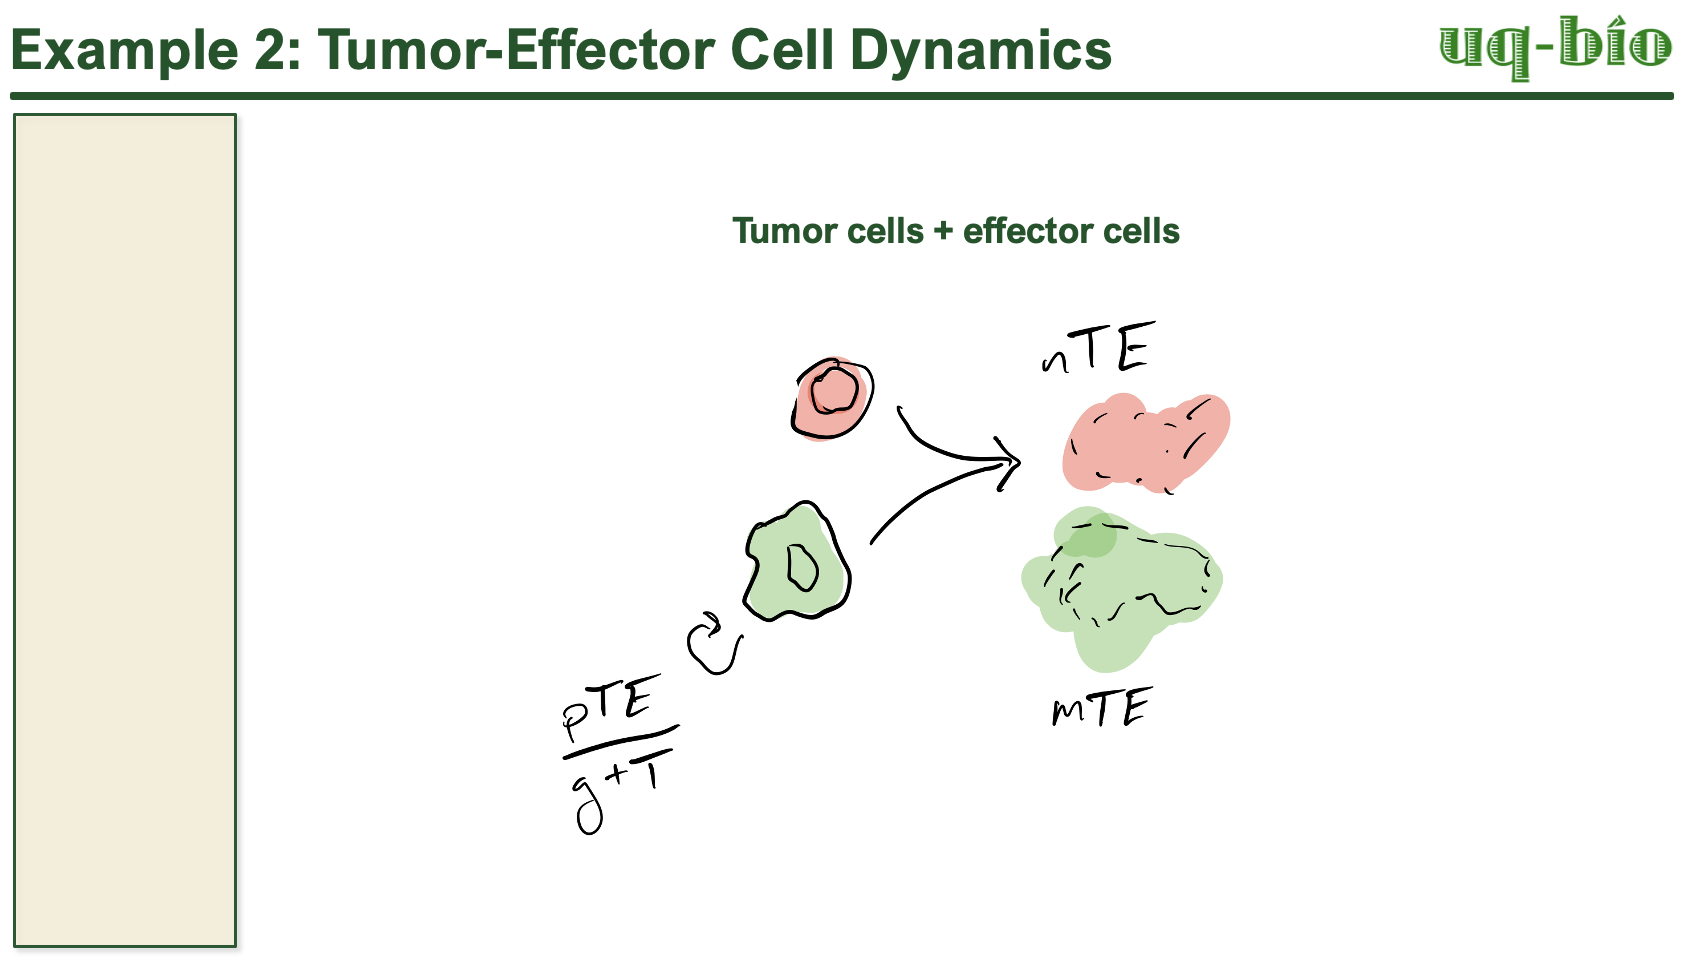

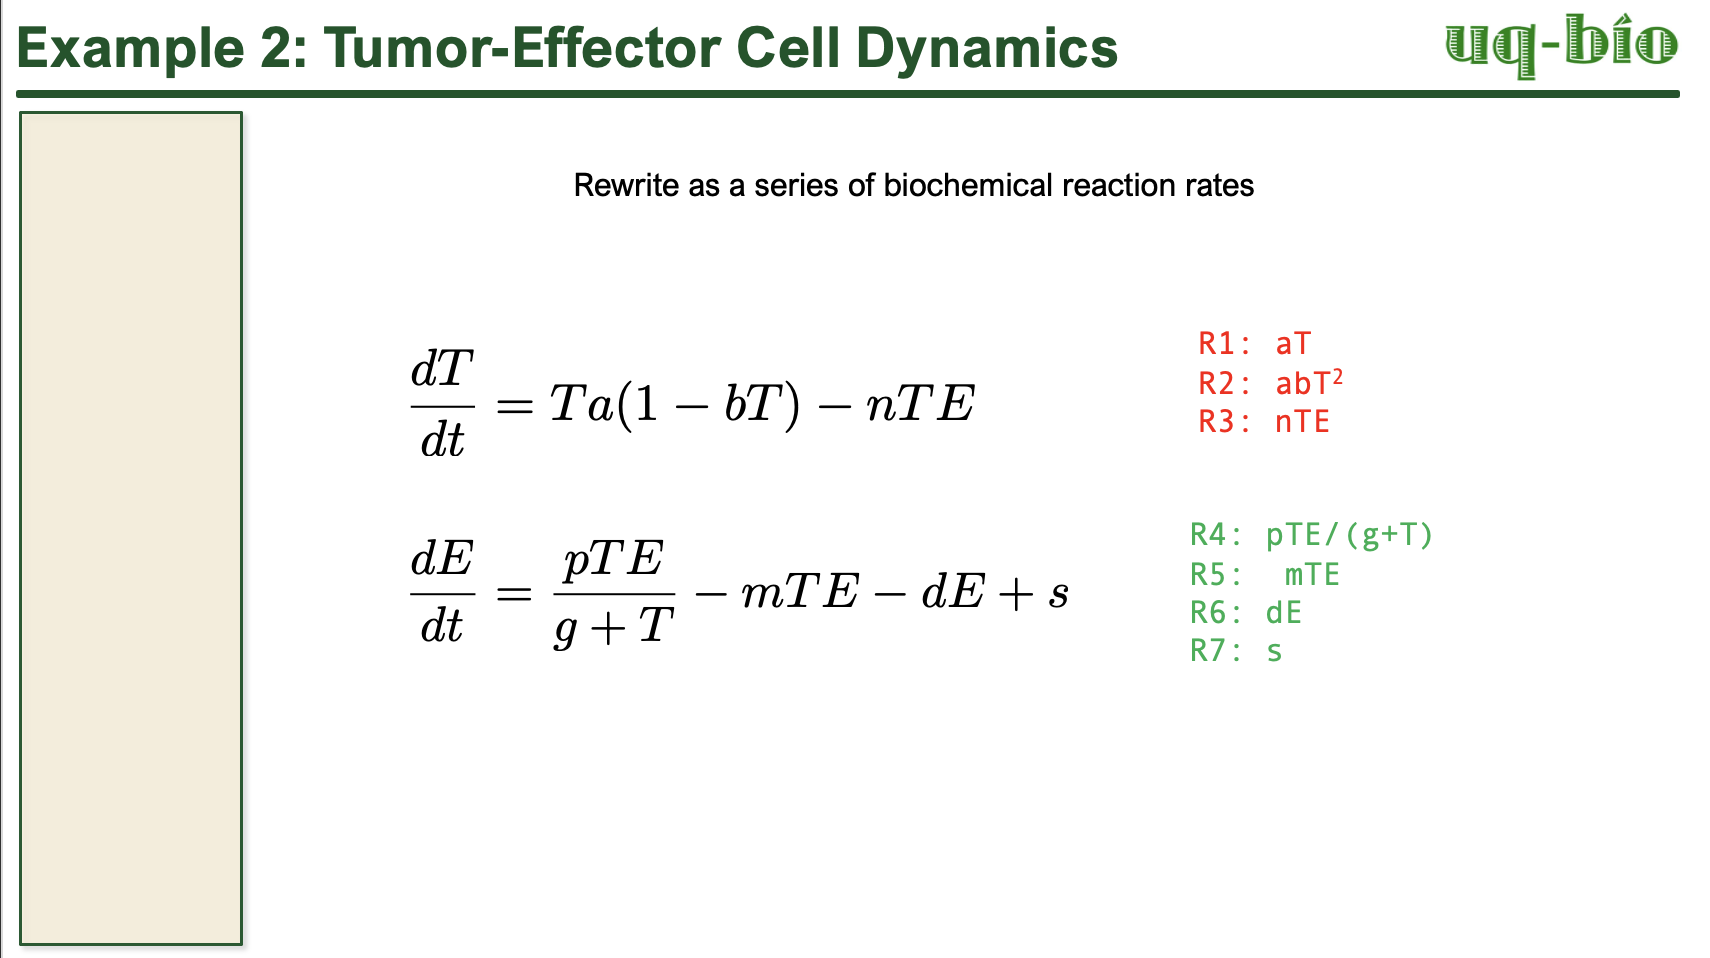

In [80]:
# Vector of Times
t = np.linspace(0, 100, 501) 

# Model Parameters
a = 1.636
b = .002
n = 1.0
p = 1.131
g = 20.19
m = 0.003311
d = .1908
s = .318

# scenario 2
# b = 0.004
# d = 2.0
# s = 0.318

# # scenario 3
b = 0.002
d = .3743
s = .1181

# a,b,n,p,g,m,d,s = Pars


In [81]:
# Vector of Initial Conditions (N_tumor, N_effector)
X = np.array([40,4], dtype=int)     

# Stoichiometry Matrix -- must be transposed (flipped) 
# Species:    N_tumor,N_effector
S = np.array([[1,    0],  # Rxn 1: Tumor cell birth   
              [-1,   0],  # Rxn 2: Tumor cell death
              [-1,   0],  # Rxn 3: Tumor cell death by effector
              [0,    1],  # Rxn 4: Effector cell birth
              [0,   -1],  # Rxn 5: Effector cell death by tumor
              [0,   -1],  # Rxn 6: Effector cell death 
              [0,    1]]).T  # Rxn 7: Effector cell immigration 
                

# Propensity Functions (anonymous function)
W = lambda X: np.array([[a*X[0]],        # Rxn 1: Tumor cell birth
                        [a*b*(X[0]**2)],   # Rxn 2: Tumor cell death
                        [n*X[0]*X[1]],   # Rxn 3: Tumor cell death by effector
                        [(p*X[0]*X[1])/ (g+X[0])],   # Rxn 4: Effector cell birth
                        [m*X[0]*X[1]],   # Rxn 5: Effector cell death by tumor
                        [d*X[1]],   # Rxn 6: Effector cell death
                        [s]]).T # Rxn 7: Effector cell immigration 

In [4]:
import tqdm.notebook as tq #progress bar
# Run the SSA for a multiple trajectories
# Total trajectories to run
N_runs = 10   #@param {type:"slider", min:10, max:100, step:1}

# Initialize output array
counts = np.empty((X.shape[0], len(t), N_runs), dtype=int)

for i in tq.tqdm(range(0,N_runs)): 
  counts[:,:,i]= SSA_traj(S, W, X, t)

# Specify position of each species in outlet variable, counts
tumor_cells = counts[0,:,:]
effector_cells = counts[1,:,:]


NameError: name 'X' is not defined

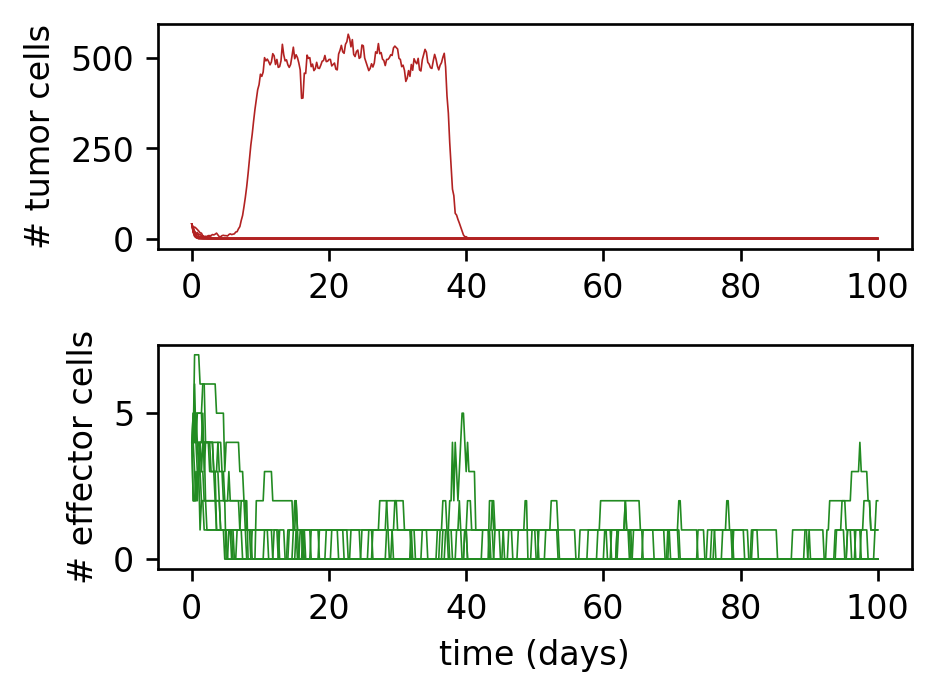

In [ ]:
# Plot the tumor cell counts and effector cell counts
f,ax = plt.subplots(2,1,figsize=(4,3))

# f.suptitle('SSA Trajectories')
ax[0].plot(t,tumor_cells, color='firebrick',
         label='tumor cells',
         linewidth=.5); 
ax[0].set_ylabel('# tumor cells')

ax[1].plot(t,effector_cells, color='forestgreen',
         label='effector cells',
         linewidth=.5); 
ax[1].set_xlabel('time (days)')
ax[1].set_ylabel('# effector cells')
f.tight_layout()


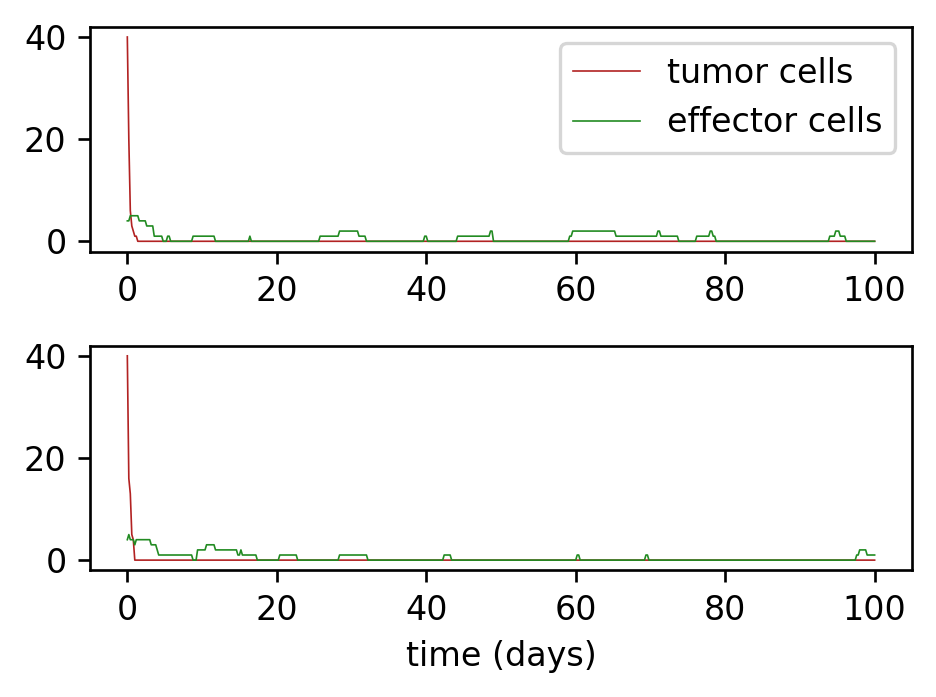

In [ ]:
# Plot the tumor cell counts and effector cell counts
for i in range(10):
    f,ax = plt.subplots(2,1,figsize=(4,3),dpi=240)

    ax[0].plot(t,tumor_cells[:,i], color='firebrick',
          label='tumor cells',
          linewidth=.5); 
    ax[0].plot(t,effector_cells[:,i], color='forestgreen',
          label='effector cells',
          linewidth=.5); 
    ax[0].legend()

    ax[1].plot(t,tumor_cells[:,5], color='firebrick',
          label='tumor cells',
          linewidth=.5); 
    ax[1].plot(t,effector_cells[:,5], color='forestgreen',
          label='effector cells',
          linewidth=.5); 

    ax[1].set_xlabel('time (days)')
    f.tight_layout()

In [ ]:
from scipy.integrate import solve_ivp
def RHS(t,x):
    dxdt = [a*x[0] - a*b*x[0]**2 - n*x[0]*x[1], 
            (p*x[0]*x[1])/ (g+x[0]) + s - m*x[0]*x[1] - d*x[1]
    ]
    return dxdt 
# Solve the ODEs for the system
x0 =np.array([40,4])    
ODE_soln = solve_ivp(RHS, [t[0], t[-1]], x0, t_eval=t)

Text(0, 0.5, '# cells')

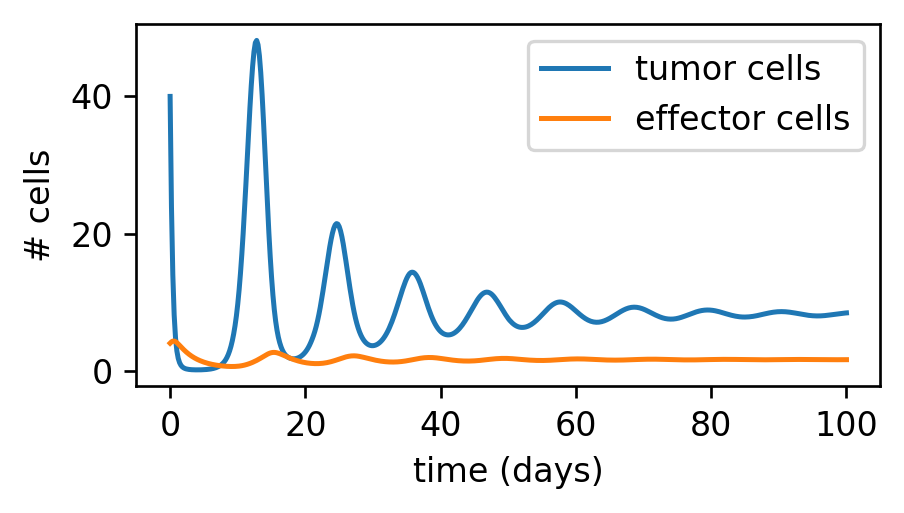

In [ ]:
# In class: 
# add the mean from the SSA runs for comparison 

f,ax = plt.subplots(figsize=(4,2),dpi=240)
ax.plot(ODE_soln.t,ODE_soln.y.T)
ax.legend(['tumor cells', 'effector cells'])
ax.set_xlabel('time (days)')
ax.set_ylabel('# cells')

# Everything below here is from UQ-bio course


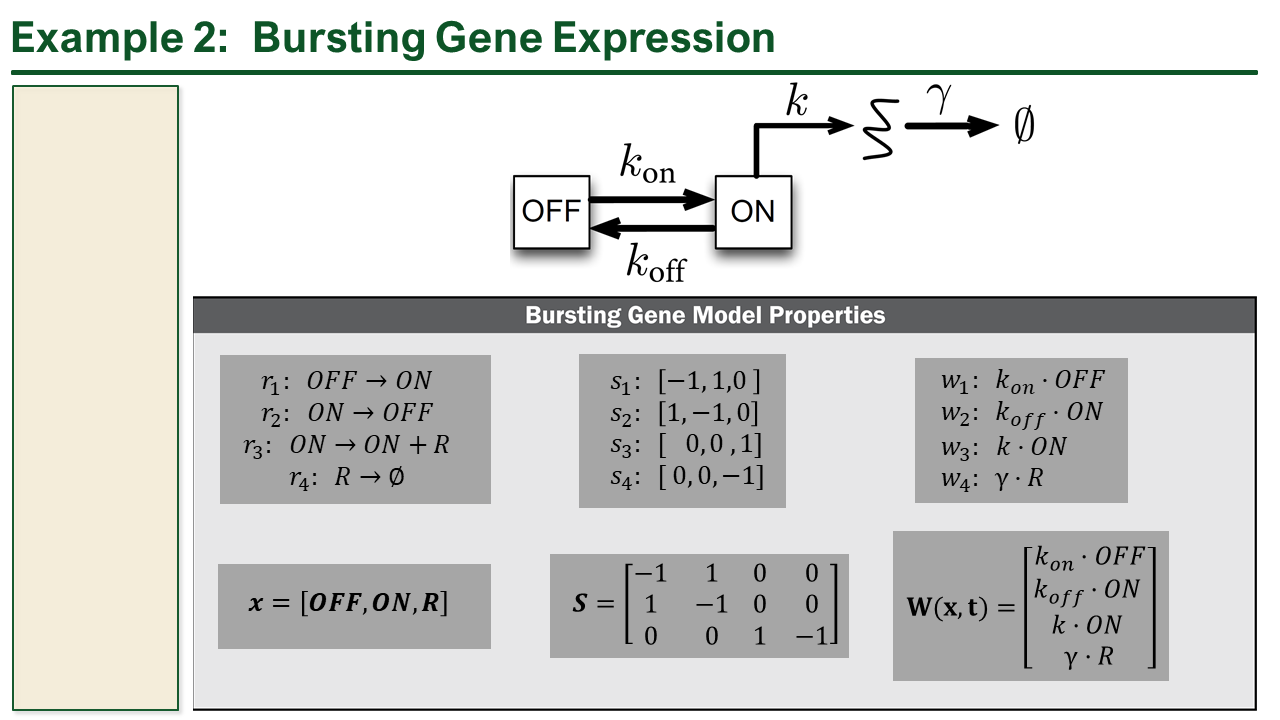

In [ ]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp d
from scipy.integrate import odeint

Define the parameters, stoichiometry matrix, and propensity functions for the model:

In [ ]:
# Vector of Times
t = np.linspace(0, 100, 101) 

# Model Parameters (k_on, k_off, k_mrna, k_mrna_decay)
Pars = np.array([0.2,0.5,10,0.1])
k_on,k_off,k_R,gamma = Pars

# Vector of Initial Conditions (OFF,ON,R)
X = np.array([1,0,0], dtype=int)   # OFF = X[0,0], ON = X[0,1], R = X[0,2]  

# Stoichiometry Matrix -- must be transposed (flipped) 
# Species:    OFF,ON,mRNA
S = np.array([[-1, 1, 0],     # Rxn 1: OFF --> ON  
              [1, -1, 0],     # Rxn 2: ON --> OFF
              [0, 0, 1],      # Rxn 3: ON --> ON + mRNA  (mRNA synthesis)
              [0, 0, -1]]).T  # Rxn 4: mRNA --> phi  (mRNA decay)

# Propensity Functions (anonymous function)
W = lambda X: np.array([[k_on*X[0]],  # Pars[0]*X[0,0]
              [k_off*X[1]],           # Pars[1]*X[0,1]
              [k_R*X[1]],          # Pars[2]*X[0,1]
              [gamma*X[2]]]).T   # Pars[3]*X[0,2]

#W = lambda X: p(X)  # Anonymous function with propensities

Text(0, 0.5, 'Probability')

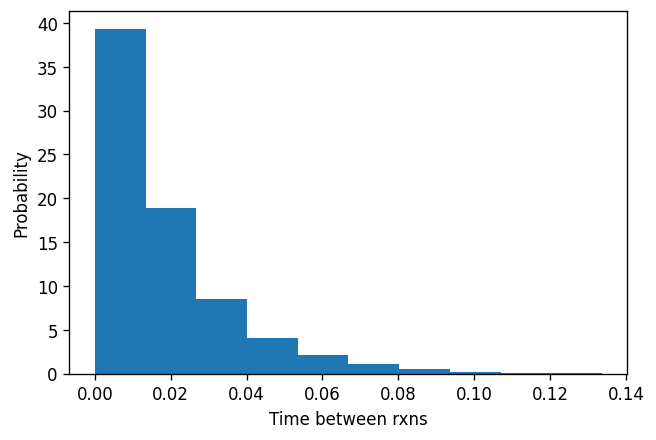

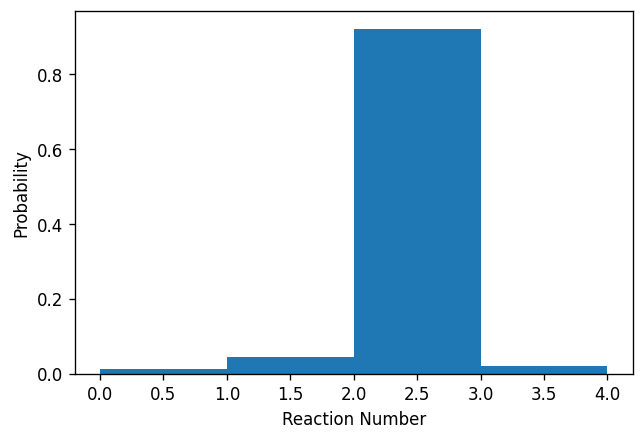

In [ ]:
# total number of runs
N = 3267  #@param {type:"slider", min:50, max:10000, step:1}

# Initialize output arrays for next time and next reaction
t_next_rxn = np.zeros(N,dtype=float);
next_rate = np.zeros(N,dtype=int);
X = np.array([3,5,12])   # OFF = X[0], ON = X[1], R = X[2]  

for i in range(0,N): 
  t_next_rxn[i],next_rate[i] = next_jump(W,X);  # Run function to get next time and next reaction  
  
plt.figure(dpi=120)
plt.hist(t_next_rxn,density=True)
plt.xlabel('Time between rxns')
plt.ylabel('Probability')
plt.figure(dpi=120)
plt.hist(next_rate,bins = np.array([0,1,2,3,4]),density=True)
plt.xlabel('Reaction Number')
plt.ylabel('Probability')


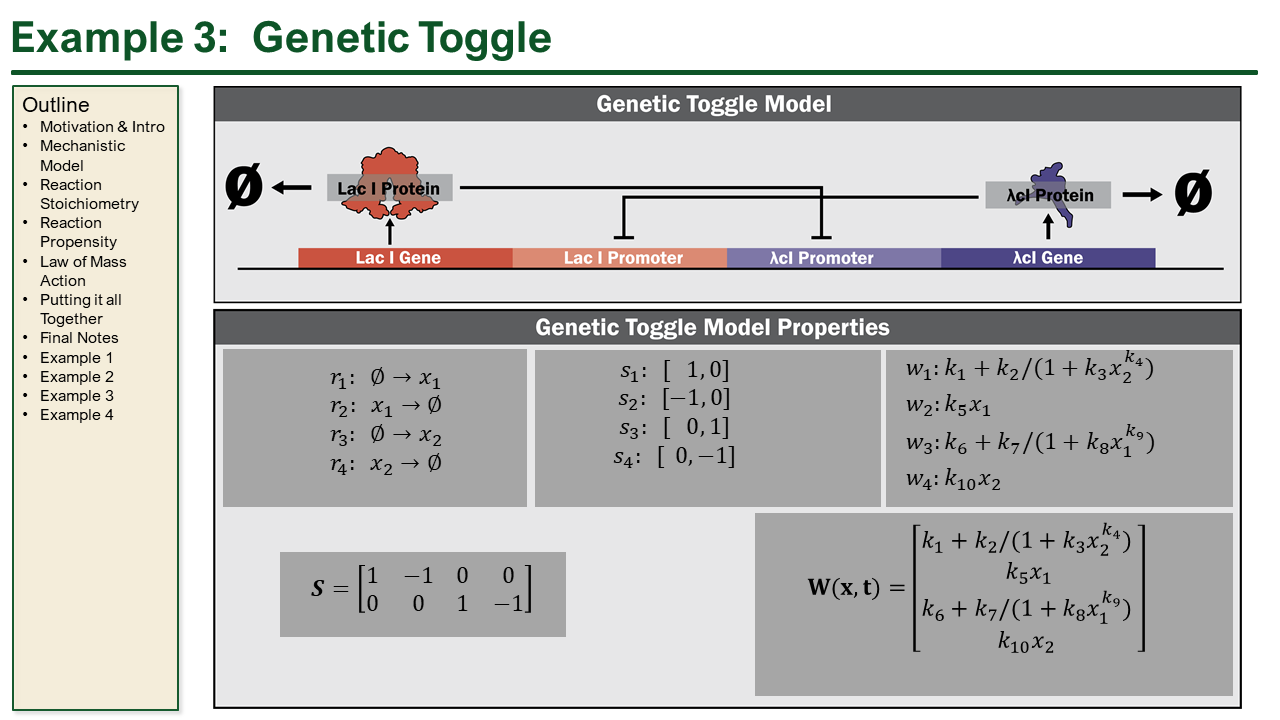

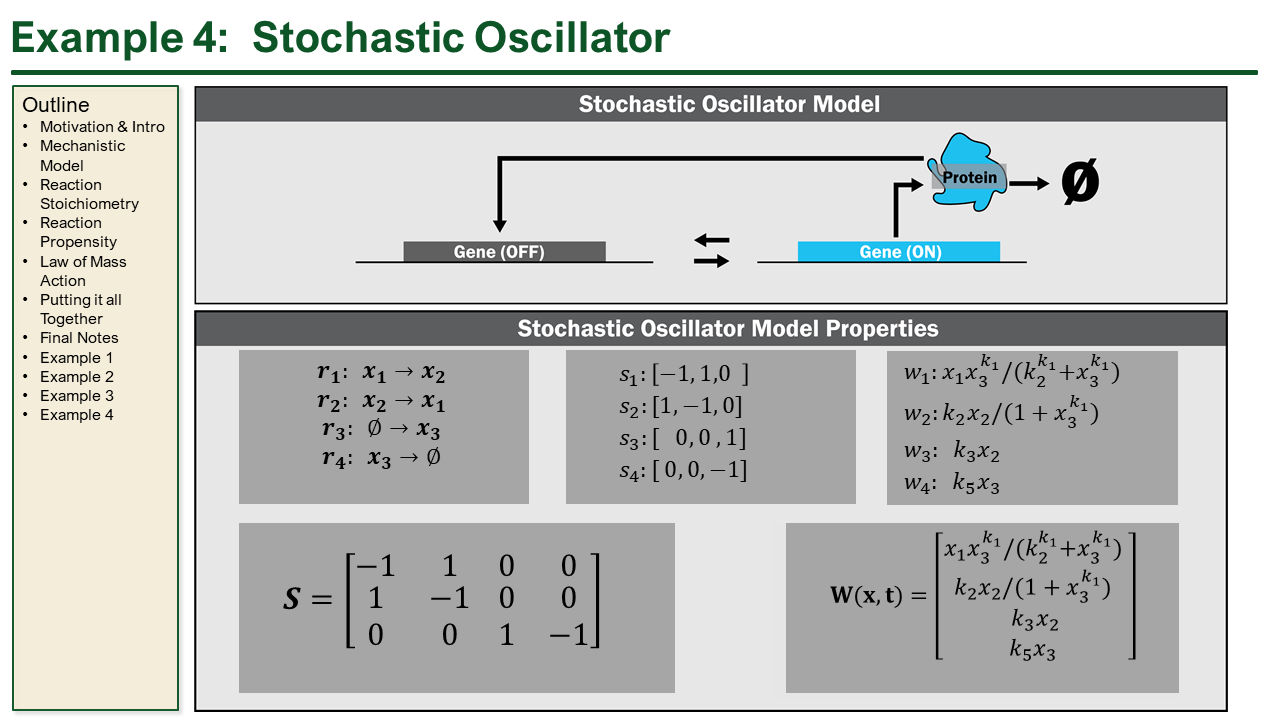


**Additional Exercises:**

- Modify the stoichiometry matrix and propensity functions for the other example models provided. 
    - Example 1: Birth/Decay Model
    - Example 3: Genetic Toggle
    - Example 4: Stochastic Oscillator
- Run the SSA for each of these example models. How do the results differ from the 2-state bursting gene model? 

